# Practice 4

## 1.1 - Linear regression

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Linear

In [124]:
delta = 1.0
x = np.linspace(-5, 5, 11)
y = x + delta * (np.random.rand(11) - 0.5)
x += delta * (np.random.rand(11) - 0.5)

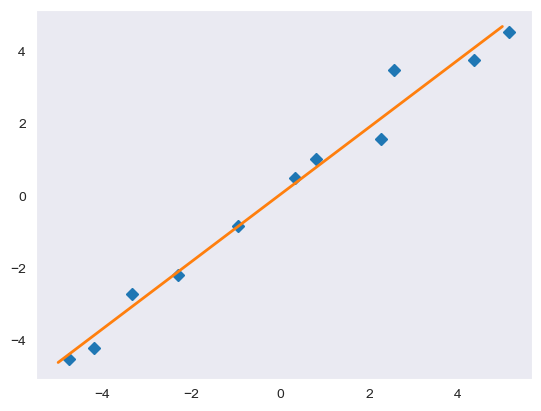

In [125]:
m = np.vstack([x, np.ones(11)]).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-5, 5, 101)
plt.plot(x, y, 'D')

plt.plot(x_prec, s[0] * x_prec + s[1], '-', lw=2)
plt.grid()

### Quadratic

In [126]:
delta = 1.0
x = np.linspace(-5, 5, 11)
y = x**2 + delta * (np.random.rand(11) - 0.5)
x += delta * (np.random.rand(11) - 0.5)

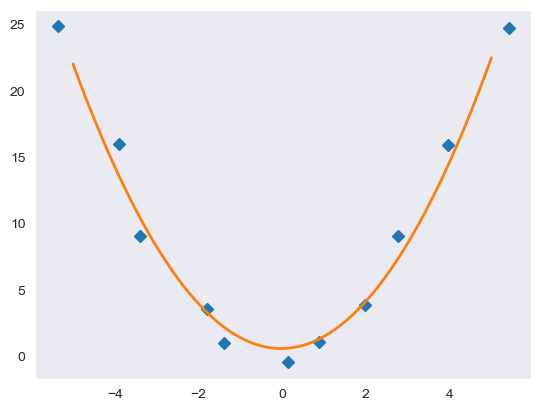

In [127]:
m = np.vstack([x**2, x, np.ones(11)]).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-5, 5, 101)
plt.plot(x, y, 'D')

plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()

### Cubic

In [128]:
delta = 1.0
x = np.linspace(-5, 5, 11)
y = x**3 + x**2 + delta * (np.random.rand(11) - 0.5)
x += delta * (np.random.rand(11) - 0.5)

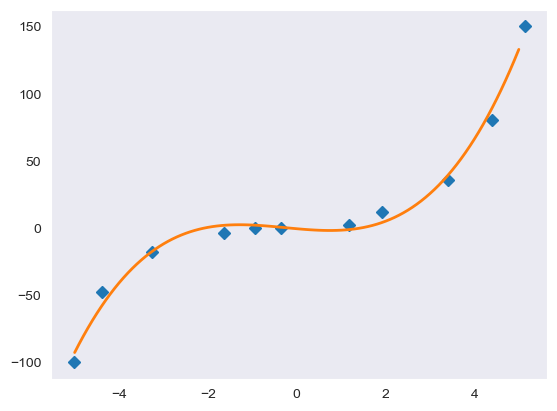

In [129]:
m = np.vstack([x**3, x**2, x, np.ones(11)]).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-5, 5, 101)
plt.plot(x, y, 'D')

plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=2)
plt.grid()

### Task 1.1.5

In [130]:
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [131]:
beta = (0.25, 0.75, 5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)

ydata = y + 5 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)

lin_dev = sum(beta_cov[0])
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

1057.6369494122698


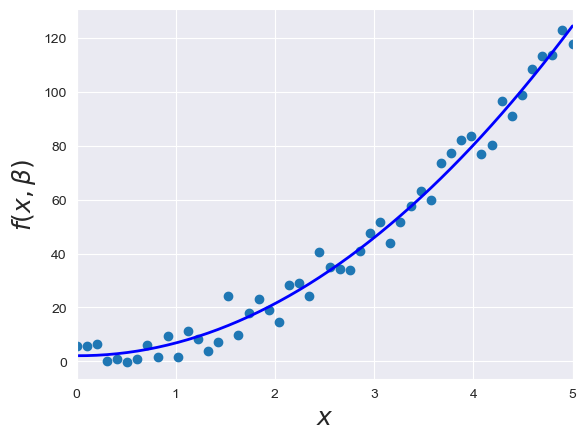

In [132]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

From the graphs we can see that the function fits our data quite well and is able to generalize the learning

## 1.2 - Linear regression (tasks)

### Task 1.2.1

In [133]:
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"

dataset = pd.read_csv(url)
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


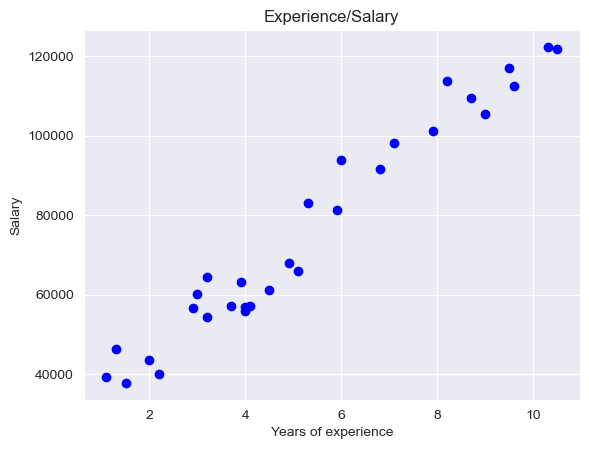

In [134]:
plt.title('Experience/Salary')
plt.scatter(dataset.YearsExperience, dataset.Salary, color='b')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

In [135]:
print(dataset.shape)
dataset.describe()

(30, 2)


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [136]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [138]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [139]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,91738.0,89912.367616
1,83088.0,75925.860298
2,109431.0,107628.610219
3,39343.0,36763.639807
4,39891.0,47020.411840
5,57081.0,64736.654443


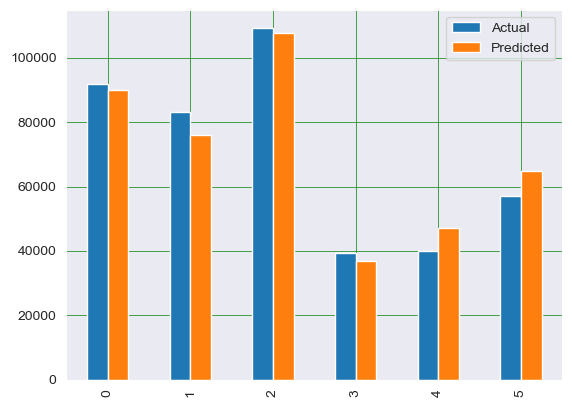

In [140]:
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

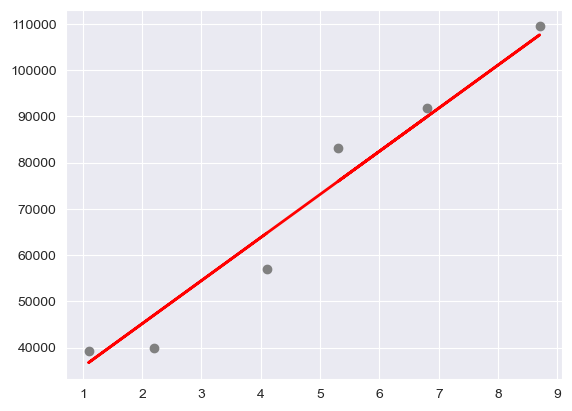

In [141]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### Task 1.3.2

In [142]:
url = "https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"

dataset = pd.read_csv(url)
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [143]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[9.0000e+00 3.5710e+03 1.9760e+03 5.2500e-01]
 [9.0000e+00 4.0920e+03 1.2500e+03 5.7200e-01]
 [9.0000e+00 3.8650e+03 1.5860e+03 5.8000e-01]
 [7.5000e+00 4.8700e+03 2.3510e+03 5.2900e-01]
 [8.0000e+00 4.3990e+03 4.3100e+02 5.4400e-01]
 [1.0000e+01 5.3420e+03 1.3330e+03 5.7100e-01]
 [8.0000e+00 5.3190e+03 1.1868e+04 4.5100e-01]
 [8.0000e+00 5.1260e+03 2.1380e+03 5.5300e-01]
 [8.0000e+00 4.4470e+03 8.5770e+03 5.2900e-01]
 [7.0000e+00 4.5120e+03 8.5070e+03 5.5200e-01]
 [8.0000e+00 4.3910e+03 5.9390e+03 5.3000e-01]
 [7.5000e+00 5.1260e+03 1.4186e+04 5.2500e-01]
 [7.0000e+00 4.8170e+03 6.9300e+03 5.7400e-01]
 [7.0000e+00 4.2070e+03 6.5800e+03 5.4500e-01]
 [7.0000e+00 4.3320e+03 8.1590e+03 6.0800e-01]
 [7.0000e+00 4.3180e+03 1.0340e+04 5.8600e-01]
 [7.0000e+00 4.2060e+03 8.5080e+03 5.7200e-01]
 [7.0000e+00 3.7180e+03 4.7250e+03 5.4000e-01]
 [7.0000e+00 4.7160e+03 5.9150e+03 7.2400e-01]
 [8.5000e+00 4.3410e+03 6.0100e+03 6.7700e-01]
 [7.0000e+00 4.5930e+03 7.8340e+03 6.6300e-01]
 [8.0000e+00 

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [145]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [146]:
X = dataset[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']]
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-43.199836
Average_income,-0.055699
Paved_Highways,-0.004303
Population_Driver_licence(%),1336.728865


In [147]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,577,574.802085
1,540,582.128539
2,554,572.479839
3,414,504.915482
4,534,452.783087
5,574,551.157353
6,566,513.859312
7,591,559.986632
8,603,594.485959
9,580,495.893323


In [148]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error:  2833.16497427551


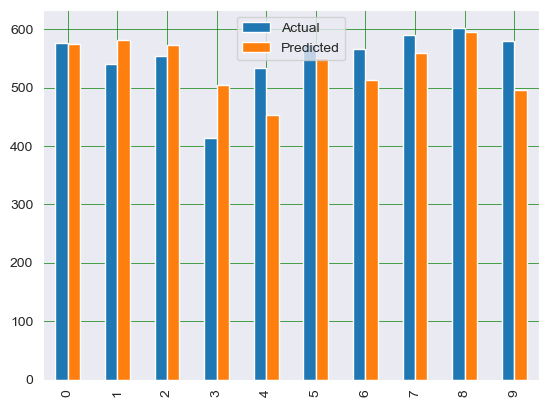

In [149]:
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

### Task 1.3.3 (linear)

In [150]:
## First variant
X = np.linspace(0, 1, 6).reshape(-1, 1)
X = np.c_[X, np.ones(X.shape[0])]
y = [3, 6, 3, 6, 4, 3]

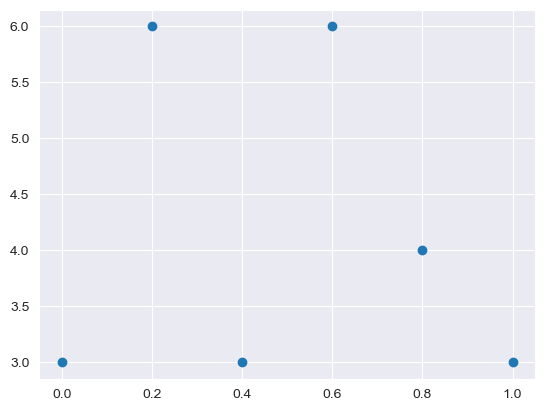

In [151]:
plt.scatter(X[:, 0], y)
plt.show()

In [152]:
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[-0.42857143  4.38095238]


In [153]:
y_pred = X[:, 0] * linreg[0] + linreg[1]
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df

,Actual,Predicted
0,3,4.380952
1,6,4.295238
2,3,4.209524
3,6,4.123810
4,4,4.038095
5,3,3.952381


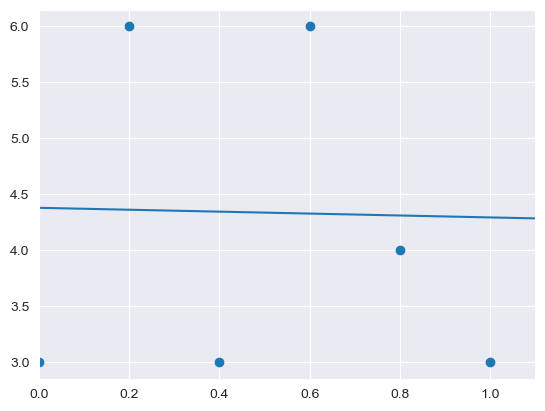

In [154]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], y)
ax.plot(X[:, 0] * linreg[0] + linreg[1])
ax.set_xlim(0, 1.1)
plt.show()

### Task 1.3.3 (quadratic)

In [155]:
X = np.linspace(0, 1, 6).reshape(-1, 1)
X = np.c_[X**2, X, np.ones(X.shape[0])]
y = [3, 6, 3, 6, 4, 3]

In [156]:
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[-7.14285714  6.71428571  3.42857143]


In [157]:
y_pred = X[:, 0] * linreg[0] + X[:, 1] * linreg[1] + linreg[2]
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df

,Actual,Predicted
0,3,3.428571
1,6,4.485714
2,3,4.971429
3,6,4.885714
4,4,4.228571
5,3,3.000000


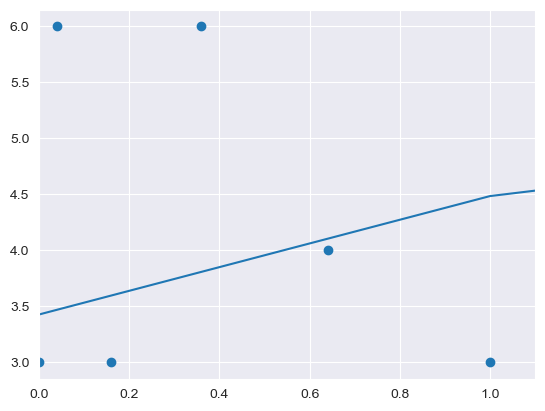

In [158]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], y)
ax.plot(X[:, 0] * linreg[0] + X[:, 1] * linreg[1] + linreg[2])
ax.set_xlim(0, 1.1)
plt.show()